In [1]:
pip install geopandas

     |████████████████████████████████| 972kB 2.8MB/s 
     |████████████████████████████████| 14.7MB 313kB/s 
     |████████████████████████████████| 10.9MB 47.8MB/s 


In [2]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point,Polygon
%matplotlib inline
import matplotlib.pyplot as plt

In [3]:
bglr=gpd.read_file('/content/MODIFIED BANGALORE WARDS.csv')
bglr.head()


,type,features__type,features__properties__WARD_NO,features__properties__WARD_NAME,features__properties__MOVEMENT_ID,features__properties__DISPLAY_NAME,features__geometry__type,features__geometry__coordinates__001,features__geometry__coordinates__002,geometry
0,FeatureCollection,Feature,2,Chowdeswari Ward,1,"Unnamed Road, Bengaluru",MultiPolygon,77.5922939,13.0971962,None
1,FeatureCollection,Feature,2,Chowdeswari Ward,1,"Unnamed Road, Bengaluru",MultiPolygon,77.5909447,13.0984219,None
2,FeatureCollection,Feature,2,Chowdeswari Ward,1,"Unnamed Road, Bengaluru",MultiPolygon,77.58908,13.1000567,None
3,FeatureCollection,Feature,2,Chowdeswari Ward,1,"Unnamed Road, Bengaluru",MultiPolygon,77.5873309,13.1013747,None
4,FeatureCollection,Feature,2,Chowdeswari Ward,1,"Unnamed Road, Bengaluru",MultiPolygon,77.5871202,13.1015574,None


In [4]:
##bglr.plot()

In [5]:
print(bglr.info())

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 35126 entries, 0 to 35125
Data columns (total 10 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   type                                  35126 non-null  object  
 1   features__type                        35126 non-null  object  
 2   features__properties__WARD_NO         35126 non-null  object  
 3   features__properties__WARD_NAME       35126 non-null  object  
 4   features__properties__MOVEMENT_ID     35126 non-null  object  
 5   features__properties__DISPLAY_NAME    35126 non-null  object  
 6   features__geometry__type              35125 non-null  object  
 7   features__geometry__coordinates__001  35125 non-null  object  
 8   features__geometry__coordinates__002  35125 non-null  object  
 9   geometry                              0 non-null      geometry
dtypes: geometry(1), object(9)
memory usage: 2.7+ MB
None


In [6]:
bglr2=gpd.read_file('/content/bangalore_wards.json')
bglr2.head()

,WARD_NO,WARD_NAME,MOVEMENT_ID,DISPLAY_NAME,geometry
0,2,Chowdeswari Ward,1,"Unnamed Road, Bengaluru","MULTIPOLYGON (((77.59229 13.09720, 77.59094 13..."
1,3,Atturu,2,"9th Cross Bhel Layout, Adityanagar, Vidyaranya...","MULTIPOLYGON (((77.56862 13.12705, 77.57064 13..."
2,4,Yelahanka Satellite Town,3,"15th A Cross Road, Yelahanka Satellite Town, Y...","MULTIPOLYGON (((77.59094 13.09842, 77.59229 13..."
3,51,Vijnanapura,4,"SP Naidu Layout 4th Cross Street, SP Naidu Lay...","MULTIPOLYGON (((77.67683 13.01147, 77.67695 13..."
4,53,Basavanapura,5,"Medahalli Kadugodi Road, Bharathi Nagar, Krish...","MULTIPOLYGON (((77.72899 13.02061, 77.72994 13..."


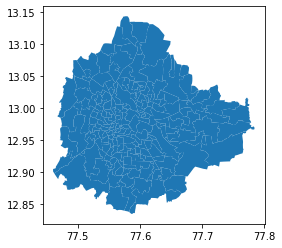

In [7]:
bglr2.plot()

In [8]:
print(bglr2.info())

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   WARD_NO       198 non-null    object  
 1   WARD_NAME     198 non-null    object  
 2   MOVEMENT_ID   198 non-null    object  
 3   DISPLAY_NAME  198 non-null    object  
 4   geometry      198 non-null    geometry
dtypes: geometry(1), object(4)
memory usage: 7.9+ KB
None


In [9]:
print(bglr2.geometry)

0      MULTIPOLYGON (((77.59229 13.09720, 77.59094 13...
1      MULTIPOLYGON (((77.56862 13.12705, 77.57064 13...
2      MULTIPOLYGON (((77.59094 13.09842, 77.59229 13...
3      MULTIPOLYGON (((77.67683 13.01147, 77.67695 13...
4      MULTIPOLYGON (((77.72899 13.02061, 77.72994 13...
                             ...                        
193    MULTIPOLYGON (((77.61399 12.92347, 77.61419 12...
194    MULTIPOLYGON (((77.68336 13.05192, 77.68384 13...
195    MULTIPOLYGON (((77.64931 13.07853, 77.64993 13...
196    MULTIPOLYGON (((77.68549 12.94121, 77.68539 12...
197    MULTIPOLYGON (((77.49854 12.92574, 77.49854 12...
Name: geometry, Length: 198, dtype: geometry


In [10]:
bglr_c=bglr2.copy()

In [11]:
bglr_c.geometry= bglr_c['geometry'].centroid
bglr_c.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  """Entry point for launching an IPython kernel.


,WARD_NO,WARD_NAME,MOVEMENT_ID,DISPLAY_NAME,geometry
0,2,Chowdeswari Ward,1,"Unnamed Road, Bengaluru",POINT (77.58042 13.12171)
1,3,Atturu,2,"9th Cross Bhel Layout, Adityanagar, Vidyaranya...",POINT (77.56004 13.10280)
2,4,Yelahanka Satellite Town,3,"15th A Cross Road, Yelahanka Satellite Town, Y...",POINT (77.58393 13.09099)
3,51,Vijnanapura,4,"SP Naidu Layout 4th Cross Street, SP Naidu Lay...",POINT (77.66957 13.00606)
4,53,Basavanapura,5,"Medahalli Kadugodi Road, Bharathi Nagar, Krish...",POINT (77.71546 13.01685)


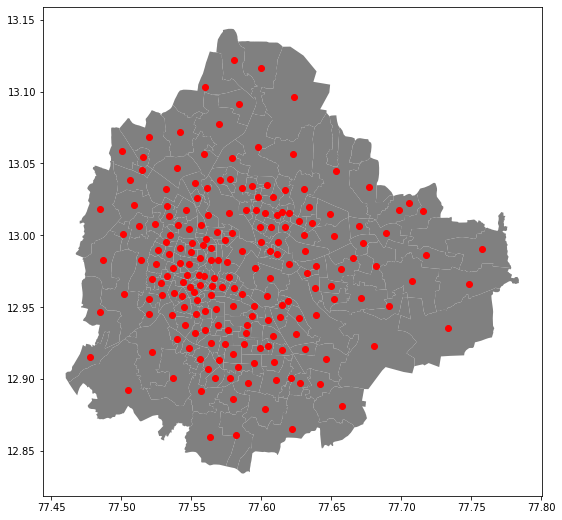

In [12]:
fig, ax = plt.subplots(figsize=(9,9))
bglr2.plot(color='grey',ax=ax)
bglr_c.plot(color='red',ax=ax)

In [13]:
bglr1=gpd.read_file('/content/bangalore-wards-2019-3-All-HourlyAggregate.csv')
bglr1.head()

,sourceid,dstid,hod,mean_travel_time,standard_deviation_travel_time,geometric_mean_travel_time,geometric_standard_deviation_travel_time,geometry
0,88,33,12,2022.22,665.53,1944.1,1.31,None
1,163,16,14,3159.21,680.03,3095.19,1.22,None
2,160,46,14,3943.34,581.21,3900.2,1.16,None
3,162,26,14,3193.64,615.47,3143.88,1.19,None
4,84,73,12,801.05,324.42,766.42,1.31,None


In [14]:
bglr1.dtypes

sourceid                                      object
dstid                                         object
hod                                           object
mean_travel_time                              object
standard_deviation_travel_time                object
geometric_mean_travel_time                    object
geometric_standard_deviation_travel_time      object
geometry                                    geometry
dtype: object

In [36]:
bglr1["mean_travel_time"] = bglr1["mean_travel_time"].astype(str).astype(float)
print(bglr1.dtypes)

sourceid                                     float64
dstid                                        float64
hod                                          float64
mean_travel_time                             float64
standard_deviation_travel_time                object
geometric_mean_travel_time                    object
geometric_standard_deviation_travel_time      object
geometry                                    geometry
dtype: object


In [51]:
##bglr1["standard_deviation_travel_time"] = bglr1["standard_deviation_travel_time"].astype(str).astype(float)
import os, sys
from scipy import stats
import numpy as np
##bglr1['standard_deviation_travel_time'] = bglr1['standard_deviation_travel_time'].astype(float)
##print(bglr1.dtypes)
##bglr1['standard_deviation_travel_time'] = bglr1.standard_deviation_travel_time.str.replace('$', '').astype(float)

In [55]:
bglr1['geometric_mean_travel_time'].replace("None", np.nan, inplace=True)
bglr1['standard_deviation_travel_time'].replace("None", np.nan, inplace=True)
bglr1['geometric_standard_deviation_travel_time'].replace("None", np.nan, inplace=True)
##bglr1['geometric_mean_travel_time'].replace("None", np.nan, inplace=True)
##bglr1["geometric_mean_travel_time"] = bglr1["geometric_mean_travel_time"].astype(str).astype(float)
##print(bglr1.dtypes)

In [56]:
bglr1['geometric_mean_travel_time'] = bglr1['geometric_mean_travel_time'].replace(np.nan, 0)
bglr1['standard_deviation_travel_time'] = bglr1['standard_deviation_travel_time'].replace(np.nan, 0)
bglr1['geometric_standard_deviation_travel_time'] = bglr1['geometric_standard_deviation_travel_time'].replace(np.nan, 0)
bglr1

,sourceid,dstid,hod,mean_travel_time,standard_deviation_travel_time,geometric_mean_travel_time,geometric_standard_deviation_travel_time,geometry
0,88.0,33.0,12.0,2022.22,665.53,1944.1,1.31,None
1,163.0,16.0,14.0,3159.21,680.03,3095.19,1.22,None
2,160.0,46.0,14.0,3943.34,581.21,3900.2,1.16,None
3,162.0,26.0,14.0,3193.64,615.47,3143.88,1.19,None
4,84.0,73.0,12.0,801.05,324.42,766.42,1.31,None
...,...,...,...,...,...,...,...,...
398337,55.0,51.0,14.0,1351.52,388.79,1309.87,1.27,None
398338,59.0,11.0,14.0,1334.32,411.91,1277.79,1.34,None
398339,46.0,159.0,17.0,4468.16,822.11,4394.74,1.2,None
398340,58.0,175.0,16.0,3637.46,786.0,3552.02,1.25,None


In [57]:
bglr1["geometric_standard_deviation_travel_time"] = bglr1["geometric_standard_deviation_travel_time"].astype(str).astype(float)
print(bglr1.dtypes)

sourceid                                     float64
dstid                                        float64
hod                                          float64
mean_travel_time                             float64
standard_deviation_travel_time                object
geometric_mean_travel_time                    object
geometric_standard_deviation_travel_time     float64
geometry                                    geometry
dtype: object


In [60]:
##bglr1["standard_deviation_travel_time"] = bglr1["standard_deviation_travel_time"].astype(str).astype(float)
##print(bglr1.dtypes)

In [59]:
bglr1["geometric_mean_travel_time"] = bglr1["geometric_mean_travel_time"].astype(str).astype(float)
print(bglr1.dtypes)

sourceid                                     float64
dstid                                        float64
hod                                          float64
mean_travel_time                             float64
standard_deviation_travel_time                object
geometric_mean_travel_time                   float64
geometric_standard_deviation_travel_time     float64
geometry                                    geometry
dtype: object


In [62]:
bglr1.dtypes

sourceid                                     float64
dstid                                        float64
hod                                          float64
mean_travel_time                             float64
standard_deviation_travel_time                object
geometric_mean_travel_time                   float64
geometric_standard_deviation_travel_time     float64
geometry                                    geometry
dtype: object

In [97]:
##bglr1["geometric_standard_deviation_travel_time"].plot()

In [98]:
##bglr1["mean_travel_time"].plot()

In [99]:
##bglr1["standard_deviation_travel_time"].plot()

In [100]:
##bglr1["geometric_mean_travel_time"].plot()

In [71]:
bglr1['hod']=pd.cut(bglr1.hod,
                    bins=[0,4,8,12,16,24],
                    labels=['Latenight','Early_morning','morning','afternoon','evening'])

TypeError: ignored

In [69]:
bglr1

,sourceid,dstid,hod,mean_travel_time,standard_deviation_travel_time,geometric_mean_travel_time,geometric_standard_deviation_travel_time,geometry
0,88.0,33.0,morning,2022.22,665.53,1944.10,1.31,None
1,163.0,16.0,afternoon,3159.21,680.03,3095.19,1.22,None
2,160.0,46.0,afternoon,3943.34,581.21,3900.20,1.16,None
3,162.0,26.0,afternoon,3193.64,615.47,3143.88,1.19,None
4,84.0,73.0,morning,801.05,324.42,766.42,1.31,None
...,...,...,...,...,...,...,...,...
398337,55.0,51.0,afternoon,1351.52,388.79,1309.87,1.27,None
398338,59.0,11.0,afternoon,1334.32,411.91,1277.79,1.34,None
398339,46.0,159.0,evening,4468.16,822.11,4394.74,1.20,None
398340,58.0,175.0,afternoon,3637.46,786.0,3552.02,1.25,None


In [72]:
bglr1

,sourceid,dstid,hod,mean_travel_time,standard_deviation_travel_time,geometric_mean_travel_time,geometric_standard_deviation_travel_time,geometry
0,88.0,33.0,morning,2022.22,665.53,1944.10,1.31,None
1,163.0,16.0,afternoon,3159.21,680.03,3095.19,1.22,None
2,160.0,46.0,afternoon,3943.34,581.21,3900.20,1.16,None
3,162.0,26.0,afternoon,3193.64,615.47,3143.88,1.19,None
4,84.0,73.0,morning,801.05,324.42,766.42,1.31,None
...,...,...,...,...,...,...,...,...
398337,55.0,51.0,afternoon,1351.52,388.79,1309.87,1.27,None
398338,59.0,11.0,afternoon,1334.32,411.91,1277.79,1.34,None
398339,46.0,159.0,evening,4468.16,822.11,4394.74,1.20,None
398340,58.0,175.0,afternoon,3637.46,786.0,3552.02,1.25,None


In [73]:
corr = bglr1.corr() #plot with actual values
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,sourceid,dstid,mean_travel_time,geometric_mean_travel_time,geometric_standard_deviation_travel_time
sourceid,1.00,0.02,0.04,0.04,-0.00
dstid,0.02,1.00,0.06,0.06,0.01
mean_travel_time,0.04,0.06,1.00,1.00,-0.36
geometric_mean_travel_time,0.04,0.06,1.00,1.00,-0.39
geometric_standard_deviation_travel_time,-0.00,0.01,-0.36,-0.39,1.00


In [75]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


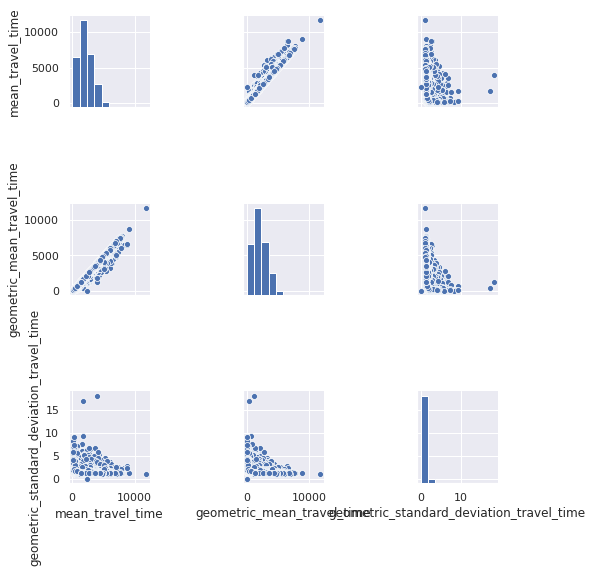

In [76]:
sns.set()
cols = ['mean_travel_time','standard_deviation_travel_time','geometric_mean_travel_time','geometric_standard_deviation_travel_time']
sns.pairplot(bglr1[cols], size = 2.5)
plt.show()

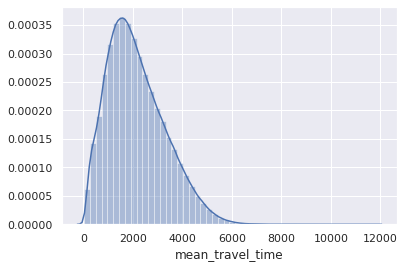

In [77]:
sns.distplot(bglr1['mean_travel_time'])

In [79]:
##sns.distplot(bglr1['standard_deviation_travel_time'])

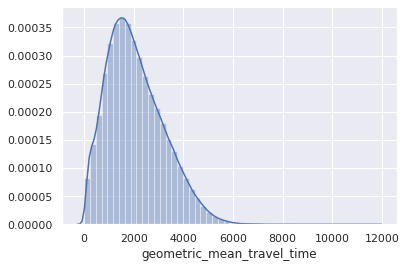

In [80]:
sns.distplot(bglr1['geometric_mean_travel_time'])

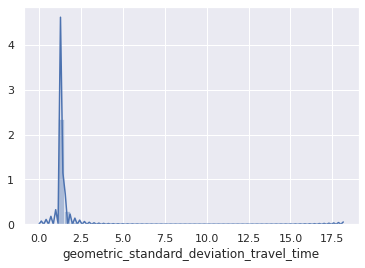

In [81]:
sns.distplot(bglr1['geometric_standard_deviation_travel_time'])

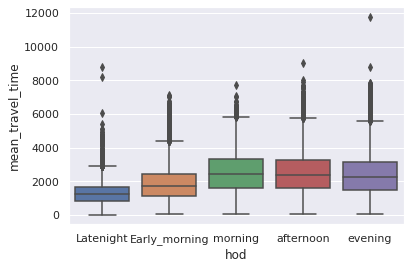

In [85]:
 box1= sns.boxplot(x='hod' , y='mean_travel_time' ,data=bglr1)

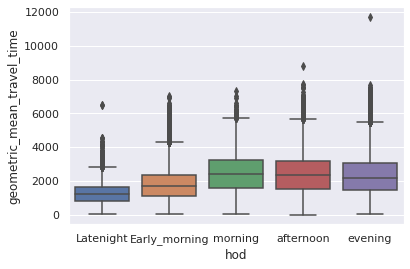

In [84]:
box1= sns.boxplot(x='hod' , y='geometric_mean_travel_time' ,data=bglr1)

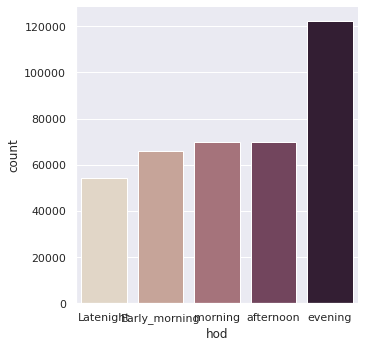

In [86]:
sns.catplot(x = "hod", kind = "count", palette = "ch: 0.25", data = bglr1)

In [88]:
##sns.catplot(x = "geometric_mean_travel_time", kind = "count", palette = "ch: 0.25", data = bglr1)

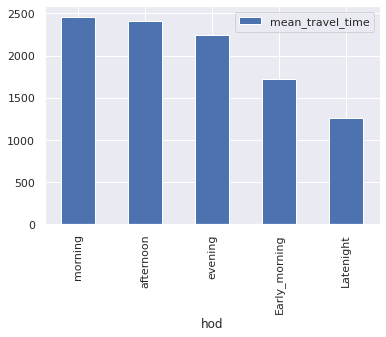

In [90]:
bglr1[['mean_travel_time', 'hod']].groupby(['hod']).median().sort_values("mean_travel_time", ascending = False).plot.bar()

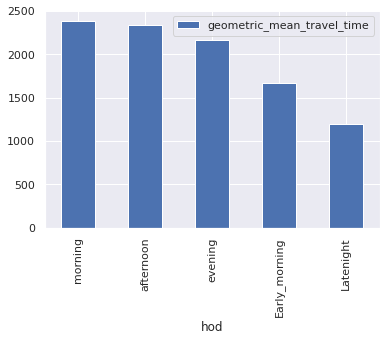

In [89]:
bglr1[['geometric_mean_travel_time', 'hod']].groupby(['hod']).median().sort_values("geometric_mean_travel_time", ascending = False).plot.bar()

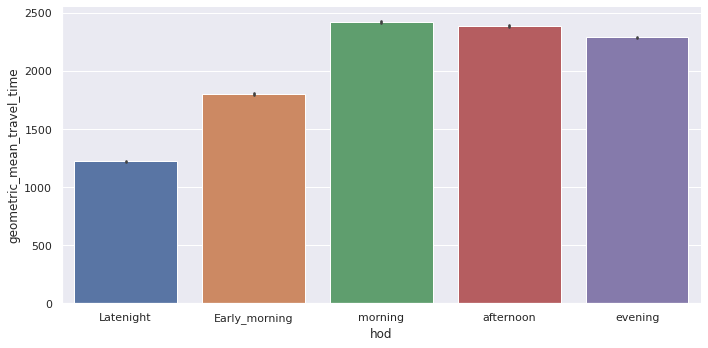

In [91]:
sns.catplot(x='hod',y='geometric_mean_travel_time',kind='bar',data=bglr1,aspect=2)

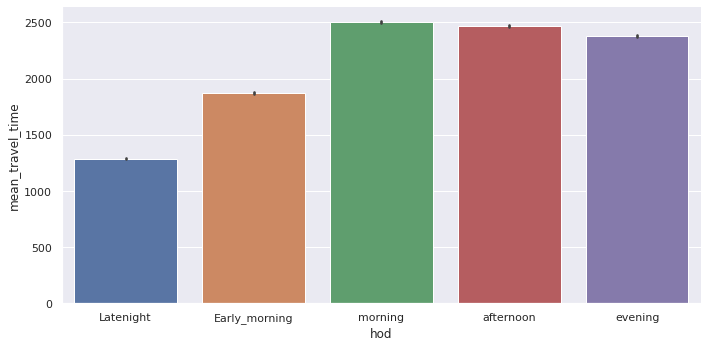

In [92]:
sns.catplot(x='hod',y='mean_travel_time',kind='bar',data=bglr1,aspect=2)

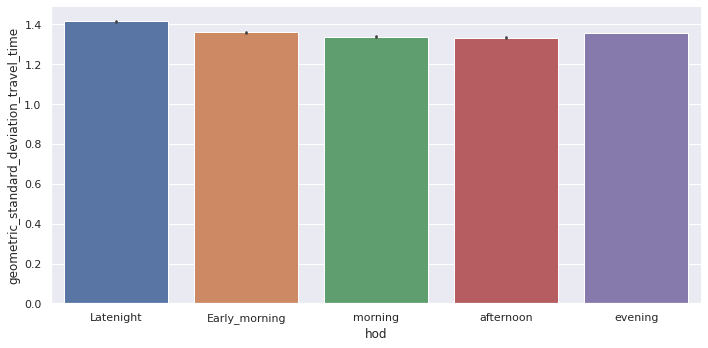

In [93]:
sns.catplot(x='hod',y='geometric_standard_deviation_travel_time',kind='bar',data=bglr1,aspect=2)

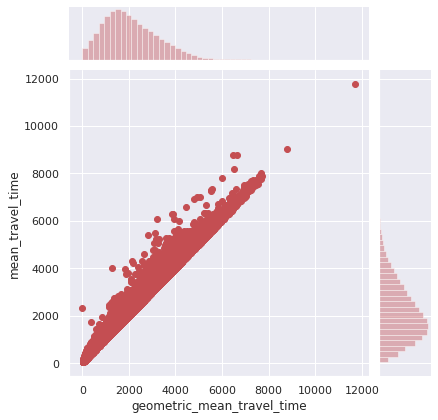

In [95]:
sns.jointplot(x='geometric_mean_travel_time',y='mean_travel_time',data=bglr1,kind='scatter',color='r')

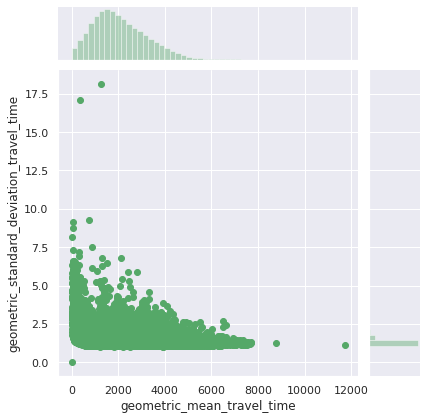

In [96]:
sns.jointplot(x='geometric_mean_travel_time',y='geometric_standard_deviation_travel_time',data=bglr1,kind='scatter',color='g')

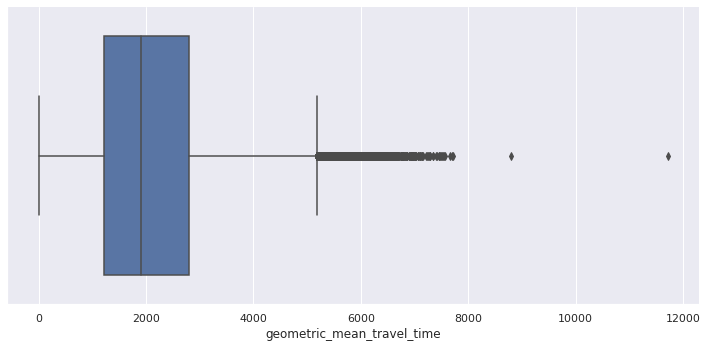

In [101]:
sns.catplot(x='geometric_mean_travel_time', kind='box',data=bglr1, aspect=2)


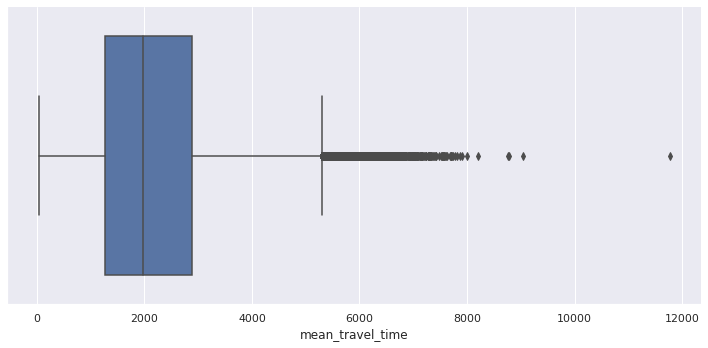

In [102]:
sns.catplot(x='mean_travel_time', kind='box',data=bglr1, aspect=2)

In [104]:
##sns.catplot(x='hod', kind='box',data=bglr1, aspect=2)

In [23]:
bglr_c.dtypes

WARD_NO          float64
WARD_NAME         object
MOVEMENT_ID      float64
DISPLAY_NAME      object
geometry        geometry
dtype: object

In [24]:
bglr_c["WARD_NO"] = bglr_c["WARD_NO"].astype(str).astype(float)
bglr_c['WARD_NAME'] = bglr_c['WARD_NAME'].astype('|S')
##bglr_c[""] = bglr_c["WARD_NAME"].astype(str).astype(float)
##bglr_c['WARD_NAME'].astype(str)
bglr_c["MOVEMENT_ID"] = bglr_c["MOVEMENT_ID"].astype(str).astype(float)
bglr_c['DISPLAY_NAME'].astype(str)
##bglr_c["DISPLAY_NAME"] = bglr_c["DISPLAY_NAME"].astype(str).astype(float)
bglr_c['geometry'].astype(str)
print(bglr_c.dtypes)

WARD_NO          float64
WARD_NAME         object
MOVEMENT_ID      float64
DISPLAY_NAME      object
geometry        geometry
dtype: object


In [25]:
bglr_c['geometry'].tail()

193    POINT (77.61442 12.92002)
194    POINT (77.67654 13.03361)
195    POINT (77.65327 13.04456)
196    POINT (77.69150 12.95074)
197    POINT (77.50501 12.89190)
Name: geometry, dtype: geometry